## Part A:  Bootstraping 




In [1]:
install.packages("ISLR2")
library(ISLR2)
set.seed(1)
library(boot)

installing the source package 'ISLR2'


Warning message:
"package 'boot' was built under R version 3.6.3"


In [2]:
# Read in data
data <- as.data.frame(read.table("../data/penn_jae.dat", header=T ))
n <- dim(data)[1]
p_1 <- dim(data)[2]
data<-subset(data,tg==4 | tg==0) 
attach(data)
#Convert T4 to dummy
T4<- (tg==4)
T4<-as.numeric(T4)
data=cbind(data,T4)
head(data)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,10607,4,9,9,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
13,10831,0,27,27,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
14,10845,0,27,27,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [3]:
m<- log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)

In [4]:
boot.fn <- function(data, index)
  coef(lm(m), 
        data = data, subset = index)

In [5]:
library(boot)
results=boot(data, boot.fn, 1000)
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1*   2.178462326  4.440892e-16 2.517329e-16
t2*  -0.071692484 -6.938894e-17 4.550508e-17
t3*   0.126368328  0.000000e+00 0.000000e+00
t4*  -0.293767980  5.551115e-17 5.553893e-17
t5*  -0.472445058 -2.775558e-16 2.088146e-16
t6*   0.029866899  6.938894e-18 4.863374e-18
t7*   0.096186517  0.000000e+00 0.000000e+00
t8*   0.073678072  1.387779e-16 9.726748e-17
t9*  -0.038506537  1.110223e-16 7.781398e-17
t10* -0.054949195  1.040834e-16 7.130591e-17
t11* -0.144177912  5.551115e-17 3.890699e-17
t12*  0.003361318  4.900594e-17 3.362683e-17
t13* -0.162772168 -5.551115e-17 3.890699e-17
t14*  0.229666708  1.110223e-16 7.781398e-17
t15*  0.126557359 -2.775558e-17 2.776946e-17
t16* -0.175352572  2.775558e-17 1.573331e-17
t17* -0.105224727 -1.387779e-17 1.388473e-17

## Part B:  Causal Tree 

### 1. First run an OLS regression to find the HTE of female*T4, remember that log(inuidur1) is the endogenous variable. Also use the HC2 correction.


In [6]:
#install.packages("devtools")  # if you don't have this installed yet.
#devtools::install_github('susanathey/causalTree') 
#install.packages("grf")
#install.packages("rpart")
#install.packages("glmnet")
#install.packages("splines")
#install.packages("MASS")
#install.packages("lmtest")
#install.packages("sandwich")
#install.packages("ggplot2")
# use e.g., install.packages("grf") to install any of the following packages.
library(causalTree)
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)

Loading required package: rpart

Loading required package: rpart.plot

Loading required package: data.table

Warning message:
"package 'glmnet' was built under R version 3.6.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 3.6.3"
Loaded glmnet 4.1-1

Warning message:
"package 'MASS' was built under R version 3.6.3"

Attaching package: 'MASS'


The following object is masked from 'package:ISLR2':

    Boston


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [7]:

#install.packages("lmtest")
library(lmtest)
library(sandwich)
datatest <- lm(log(inuidur1)~T4*(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd))
ols.cra = coeftest(datatest, vcov = vcovHC(datatest, type="HC2"))
print(ols.cra)


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      2.13125459  0.19810080 10.7584 < 2.2e-16 ***
T4               0.04856915  0.31556294  0.1539 0.8776847    
female           0.09490334  0.04355673  2.1788 0.0293891 *  
black           -0.30429050  0.07295465 -4.1710 3.084e-05 ***
othrace         -0.42765446  0.33428679 -1.2793 0.2008486    
factor(dep)1     0.09594279  0.06662605  1.4400 0.1499238    
factor(dep)2     0.09691807  0.05664159  1.7111 0.0871282 .  
q2               0.14158917  0.19562706  0.7238 0.4692398    
q3               0.01894811  0.19524713  0.0970 0.9226930    
q4              -0.00599285  0.19582876 -0.0306 0.9755878    
q5              -0.10108651  0.19540413 -0.5173 0.6049552    
q6               0.03627669  0.20716751  0.1751 0.8610017    
agelt35         -0.16608654  0.04541272 -3.6573 0.0002575 ***
agegt54          0.17800641  0.07163863  2.4848 0.0129951 *  
durable          0.11054325  0.05970872  1.8

The HTE of female*T4 is 0.0909

## 2. Replicate the causal tree estimation:

Use the next specification or formula log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)

In [23]:
# Treatment: T4 indicates the treatment group(bonus amount-qualification period) of each claimant.
treatment<-"T4"
#Outcome: induidur1 indicates a mesuare of (in weeks) of the first spell of unemployment
outcome<-"log(inuidur1)"
# Additional covariates
covariables<-c("female","black","othrace","factor(dep)","q2","q3","q4","q5","q6","agelt35","agegt54","durable","lusd","husd")

In [24]:
# Dividing data into three subsets
indices <- split(seq(nrow(data)), sort(seq(nrow(data)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [25]:

# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd),            # Define the model
  data=data[indices$split,],
  treatment=data[indices$split, treatment],
  est_data=data[indices$est,],
  est_treatment=data[indices$est, treatment],
  minsize=1,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

[1] 2
[1] "CT"


In [26]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)

cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

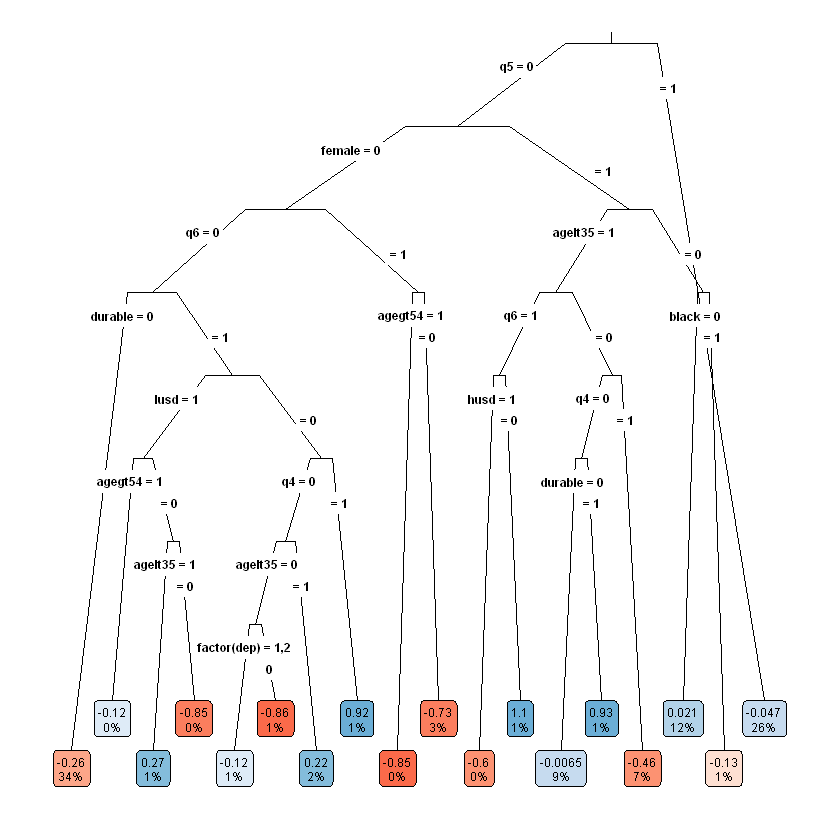

In [29]:
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.3,          # Shape of the branch lines
  box.palette="RdBu") # Palette for coloring the node

In [ ]:
Cuando te hacen la pregunta y no te encuentraste en el quinto trimestre, no eres mujer y además no trabajas en el sector manufacturero el efecto heterogeneo es -0.26